In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the dataset (if not already in memory)
file_path = "datap/processed_clinical_result.csv"
df = pd.read_csv(file_path)

# Define features (X) and target (y)
X = df.drop(columns=["label"])
y = df["label"]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [5]:
# Predict on test data
y_pred = log_reg.predict(X_test)


Logistic Regression Accuracy: 0.8944

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       118
           1       0.84      0.74      0.79        43

    accuracy                           0.89       161
   macro avg       0.88      0.85      0.86       161
weighted avg       0.89      0.89      0.89       161



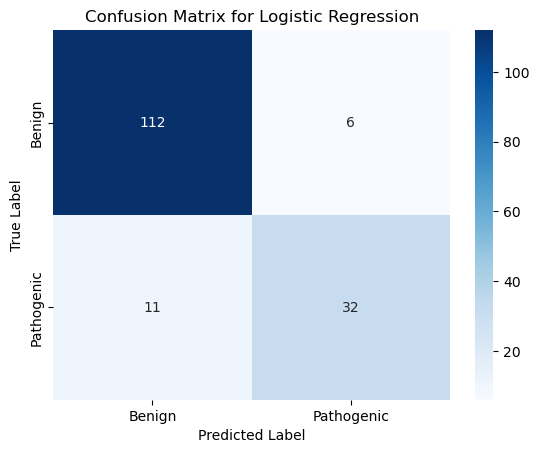

In [6]:
# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Pathogenic"], yticklabels=["Benign", "Pathogenic"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
